In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine = load_wine(as_frame=True)

In [3]:
X = wine.data

In [4]:
X.shape

(178, 13)

In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Visualization

In [6]:
column_names = [x for x in X.columns]
column_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [47]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

There are 59 class 0 obs, 71 class 1 obs, 48 class 2 obs.

In [8]:
# Get subplot coordinates function I created for another project. 
# Its changed slightly for each application, in this instance the 12 loops are unique for this 
# project
def gets_subplot_coords(df):
    coords = []
    m=0
    n=0
    for i in range(0,len([x for x in X.columns])):
        coords.append([m,n])
        n+=1
        if n in [3,6,9,12]:
            m+=1
            n=0
    return coords

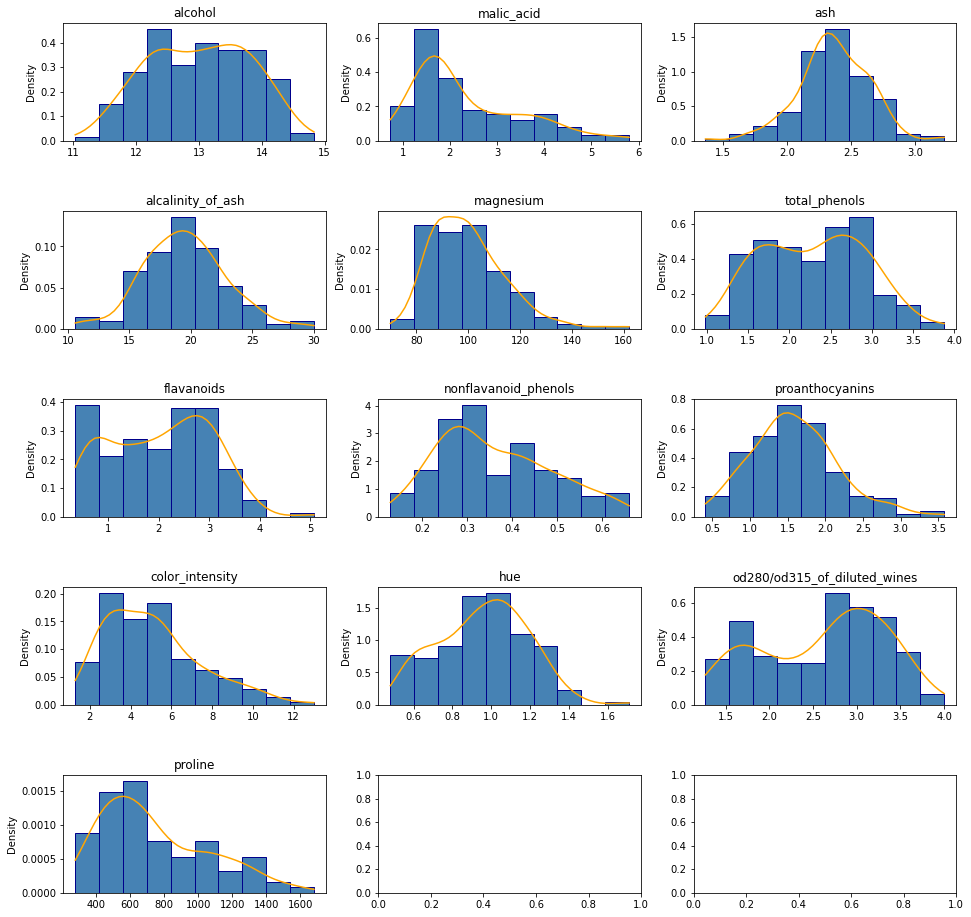

In [9]:
# Visualize density distributions for features
from scipy import stats

fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (16,16))

ax_coords = gets_subplot_coords(X)
index = 0

for feature in X:

    loc = ax_coords[index]
    # Plot hist for each feature
    axs[loc[0], loc[1]].hist(x = X[feature], bins = 10, density = True, 
                                     color = "steelblue", ec = "darkblue")
    min_ = min( X[feature] )
    max_ = max( X[feature] )
    # Create KDE object, interval
    kde = stats.gaussian_kde(X[feature])
    xx = np.linspace(min_, max_)

    # Fit KDE to hist
    axs[loc[0], loc[1]].plot(xx, kde(xx), color = "orange")

    # Set axis settings
    axs[loc[0], loc[1]].set_title(str(feature))
    axs[loc[0], loc[1]].set_ylabel('Density')
    
    # Adjust spacing for overlap
    fig.subplots_adjust(hspace = 0.6)
    
    index+=1

In [10]:
# Get data of interest for visualizing
df_target_alc = X.copy()
df_target_alc['wine_class'] = wine.target
df_target_alc = df_target_alc.drop(['malic_acid', 
                    'ash', 'alcalinity_of_ash', 
                    'magnesium', 'nonflavanoid_phenols',
                    'proanthocyanins', 'color_intensity',
                    'hue', 'od280/od315_of_diluted_wines', 
                    'proline'], axis = 1)

df_target_0 = df_target_alc.loc[df_target_alc['wine_class'] == 0]
df_target_1 = df_target_alc.loc[df_target_alc['wine_class'] == 1]
df_target_2 = df_target_alc.loc[df_target_alc['wine_class'] == 2]

In [11]:
df_target_0.columns

Index(['alcohol', 'total_phenols', 'flavanoids', 'wine_class'], dtype='object')

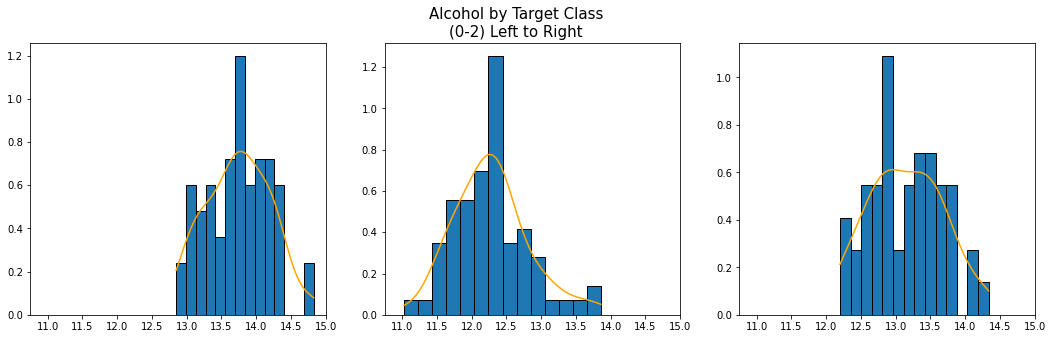

In [12]:
# Visualize alcohol by target class
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

group = 0
    
ax1.hist(x = df_target_0['alcohol'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')
ax2.hist(x = df_target_1['alcohol'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')
ax3.hist(x = df_target_2['alcohol'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')

targ0 = [min(df_target_0['alcohol']), max(df_target_0['alcohol'])]
targ1 = [min(df_target_1['alcohol']), max(df_target_1['alcohol'])]
targ2 = [min(df_target_2['alcohol']), max(df_target_2['alcohol'])]


# Create KDE object, interval
kde = stats.gaussian_kde(df_target_0['alcohol'])
kde1 = stats.gaussian_kde(df_target_1['alcohol'])
kde2 = stats.gaussian_kde(df_target_2['alcohol'])

xx = np.linspace(targ0[0], targ0[1])
xx1 = np.linspace(targ1[0], targ1[1])
xx2 = np.linspace(targ2[0], targ2[1])

# Plot the kernel
ax1.plot(xx, kde(xx), color = 'orange')
ax2.plot(xx1, kde1(xx1), color = 'orange')
ax3.plot(xx2, kde2(xx2), color = 'orange')

# Add constant x axis for better comparisons
ax1.set_xlim(10.75, 15)
ax2.set_xlim(10.75, 15)
ax3.set_xlim(10.75, 15)
    
        
# Iterate for next class group
group += 1
    
plt.suptitle('Alcohol by Target Class\n(0-2) Left to Right', size = 15)    
plt.show()

* Class 0 has a mean around 13.75% AB with std. 0.75%.
* Class 1 has a mean around 12.25% ABV with std. 12.5%. 
* Class 2 has a mean around 13% ABV with std. 0.75%.

In [13]:
# Conduct one-way ANOVA analysis for equal means
# h0 = t0 = t1 = t1 (target0,...)
# ha = ~h0
from scipy.stats import f_oneway


anova = f_oneway(df_target_0['alcohol'], df_target_1['alcohol'], df_target_2['alcohol'])
print("P-value:", anova.pvalue)
print("F-statistic:",anova.statistic)

P-value: 3.319503795619655e-36
F-statistic: 135.07762424279912


Because the P-value is 3.31*10^-36, we can safely reject the null hypothesis that the mean alcohol ratings are the same. There is statistically significant evidence to suggest that one or more of the classes has a different mean alcohol percentage. This test confirms our initial suspicions. 

This may come in handy during classification as a useful splitting tool for decision trees. 

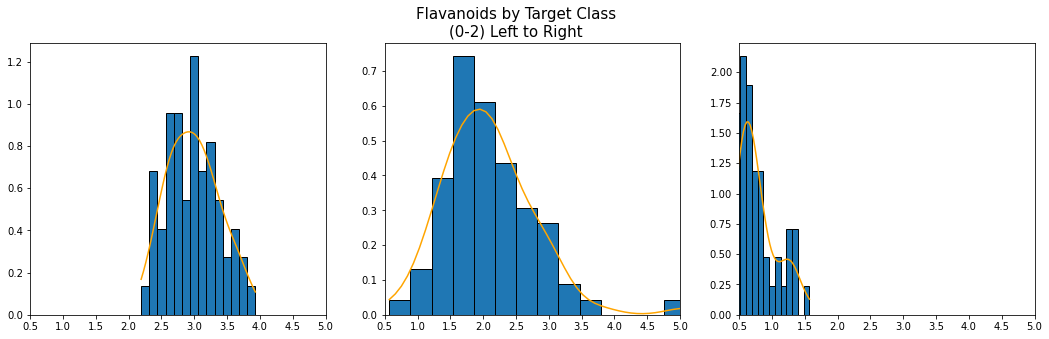

In [14]:
# Visualize alcohol by target class
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

    
ax1.hist(x = df_target_0['flavanoids'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')
ax2.hist(x = df_target_1['flavanoids'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')
ax3.hist(x = df_target_2['flavanoids'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')

targ0 = [min(df_target_0['flavanoids']), max(df_target_0['flavanoids'])]
targ1 = [min(df_target_1['flavanoids']), max(df_target_1['flavanoids'])]
targ2 = [min(df_target_2['flavanoids']), max(df_target_2['flavanoids'])]


# Create KDE object, interval
kde = stats.gaussian_kde(df_target_0['flavanoids'])
kde1 = stats.gaussian_kde(df_target_1['flavanoids'])
kde2 = stats.gaussian_kde(df_target_2['flavanoids'])

xx = np.linspace(targ0[0], targ0[1])
xx1 = np.linspace(targ1[0], targ1[1])
xx2 = np.linspace(targ2[0], targ2[1])

# Plot the kernel
ax1.plot(xx, kde(xx), color = 'orange')
ax2.plot(xx1, kde1(xx1), color = 'orange')
ax3.plot(xx2, kde2(xx2), color = 'orange')

ax1.set_xlim(0.5, 5)
ax2.set_xlim(0.5, 5)
ax3.set_xlim(0.5, 5)

# Add constant x axis for better comparisons

plt.suptitle('Flavanoids by Target Class\n(0-2) Left to Right', size = 15)    
plt.show()

* Class 0 has a mean around 2.8, normally distributed with mean 2.8, std 0.6. 
* Class 1 has a mean around 2. 
* Class 2 has a mean around 0.6 and highly skewed left. 


Its harder to gauge these variances as there are intense skews at play. For this reason, the model assumptions of a One-way ANOVA test for equal means are not met, and thus the results will not be accurate.

In [15]:
# Get summary statistics of numerical data
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


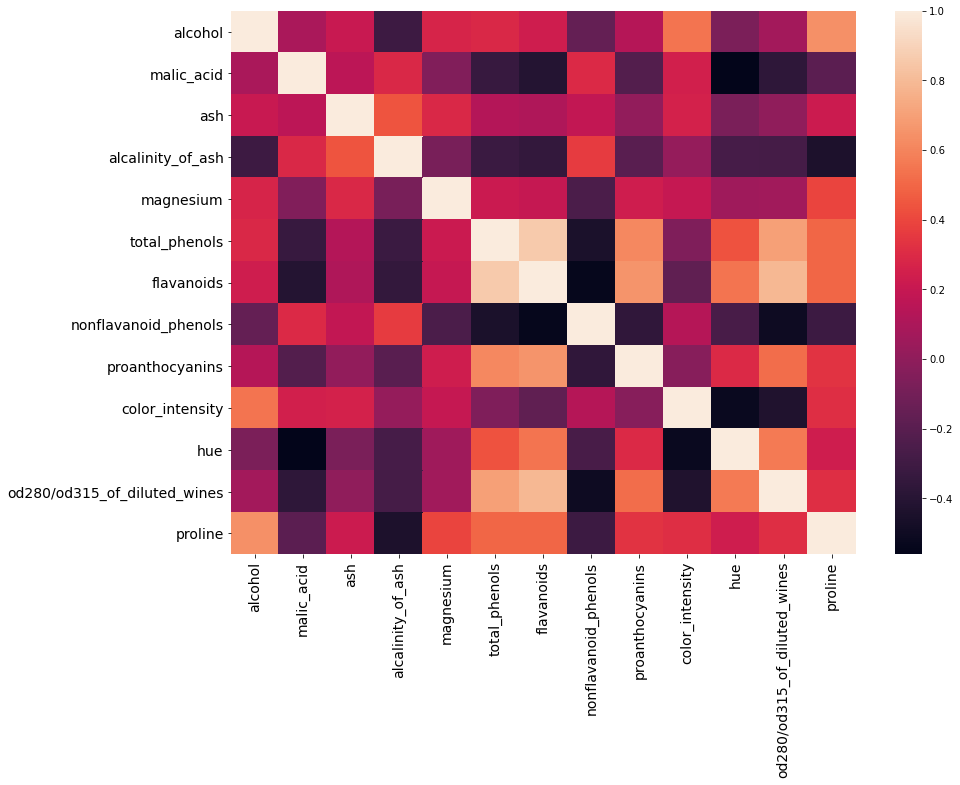

In [16]:
# Visualize heatmap for column pairwise correlation
import seaborn as sns

plt.figure(figsize = (14,10))

df_heatmap = X

sns.heatmap(df_heatmap.corr())
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.show()

In [17]:
# Prepare target data
target = wine.target
target.value_counts()
y = np.ravel(target)
y.shape

(178,)

# Train/ Test split

In [18]:
# Split data for model creation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1224)

## Standardize Data

In [19]:
# Normalize data after split to minimize data leakage
from sklearn.preprocessing import StandardScaler

for split in [X_train, X_test]:
    scaler = StandardScaler()
    scaler.fit_transform(split)

In [20]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0


In [21]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# Model Creation

In [22]:
# Import libraries for performance output
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Support Vector Classification

In [23]:
# Support Vector Classifier to group wine types
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 1224)
classifier.fit(X_train, np.ravel(y_train))

SVCy_pred = classifier.predict(X_test)
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, SVCy_pred)))

svc_accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(svc_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(svc_accuracies.std()))

Accuracy: 0.94
Cross Validated Accuracy: 91.99 %
Cross Validated Standard Deviation: 0.06


## Decision Tree

In [24]:
# Decision Tree Classifier to break down detailed classifications
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
tree = clf.fit(X_train, y_train)

tree_y_pred = tree.predict(X_test)

tree_accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)

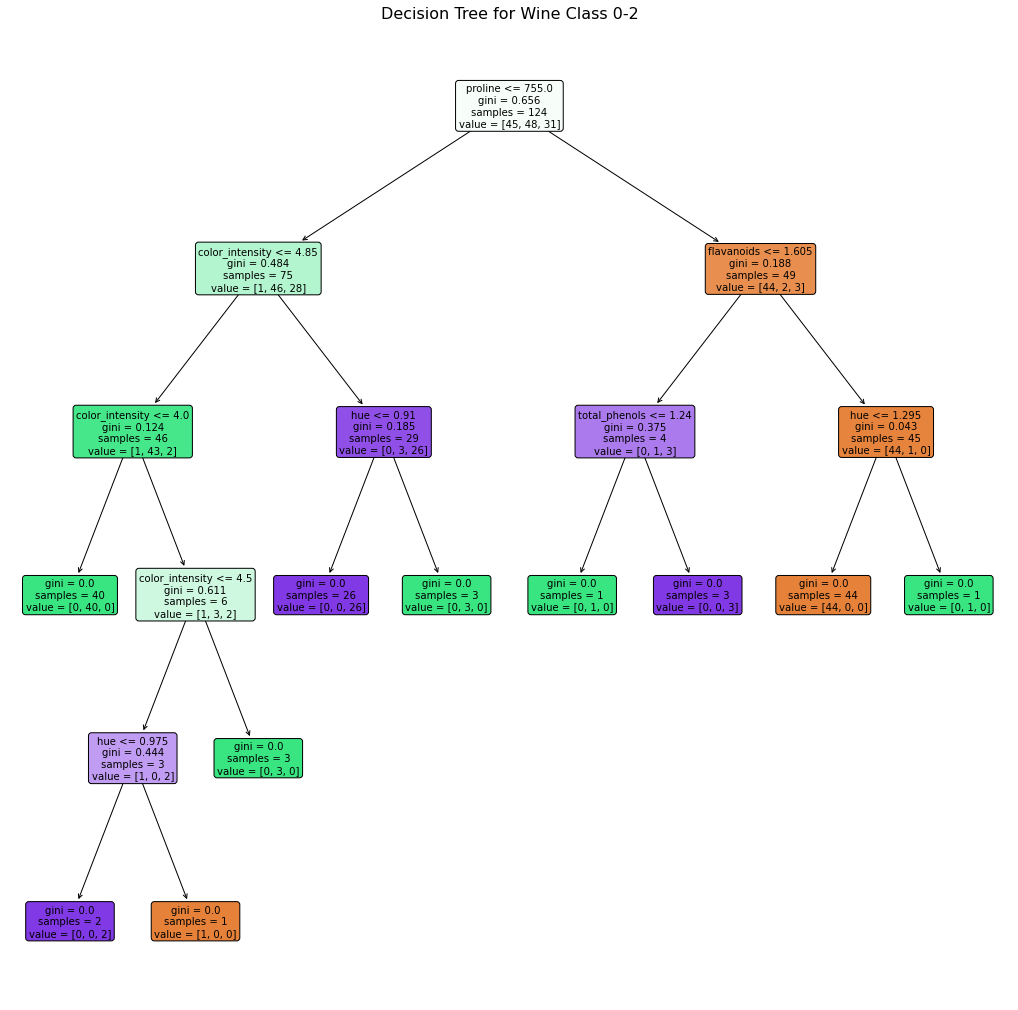

In [25]:
# Visualize Tree Classification
from sklearn import tree

plt.figure(figsize = (18,18))

tree.plot_tree(clf, 
              feature_names = X.columns, 
              filled = True, rounded = True)

plt.title('Decision Tree for Wine Class 0-2', size = 16)

plt.show()

In [26]:
# Report accuracy metrics for decision tree
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, tree_y_pred)))
print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies.std()))

Accuracy: 0.85 %
Cross Validated Accuracy: 93.53 %
Cross Validated Standard Deviation: 0.05


In [27]:
# Lets try with max depth 3 to avoid overfitting. Less decisions is simple -- simple is better
clf = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state=0)
tree2 = clf.fit(X_train, y_train)

tree_y_pred2 = tree2.predict(X_test)

tree_accuracies2 = cross_val_score(estimator = tree2, X = X_train, y = y_train, cv = 10)

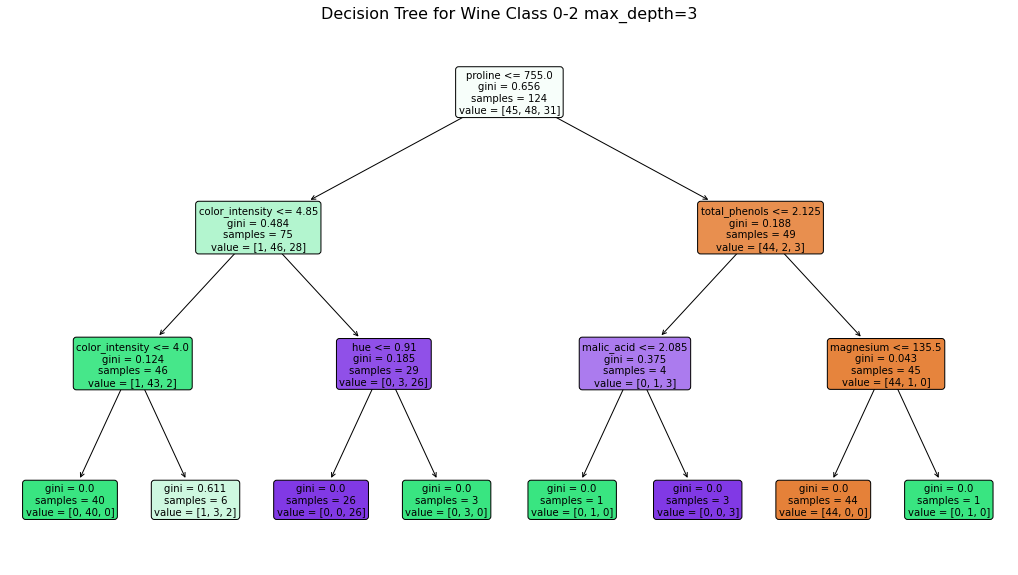

In [28]:
# Visualize depth=3 Tree Classification
from sklearn import tree

plt.figure(figsize = (18,10))

tree.plot_tree(clf, 
              feature_names = X.columns, 
              filled = True, rounded = True)

plt.title('Decision Tree for Wine Class 0-2 max_depth=3', size = 16)

plt.show()

In [29]:
# Report accuracy metrics for constrained tree
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, tree_y_pred2)))
print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies2.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies2.std()))

Accuracy: 0.89 %
Cross Validated Accuracy: 91.86 %
Cross Validated Standard Deviation: 0.05


### Results
By limiting the depth of the tree and thus the maximum decisions, we can simplify the classification, and increase the accuracy by 3%. Cross-validated, the model performs with about 1.5% lower accuracy. 

However, by limiting the depth we can also be sure to avoid overfitting, which may be evident by the higher cross-validation score. 

## Random Forest

In [30]:
# Random Forest Classifier (More robust decision tree)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = "gini", 
                            bootstrap = True, oob_score = True, 
                            random_state = 1224)
rf = rf.fit(X_train,y_train)

# Predict Values
forest_pred = rf.predict(X_test)

# Output scores
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, forest_pred)))
print("Out-of-bag sample score: {:.2f}".format(rf.oob_score_))

Accuracy: 1.00 %
Out-of-bag sample score: 0.98


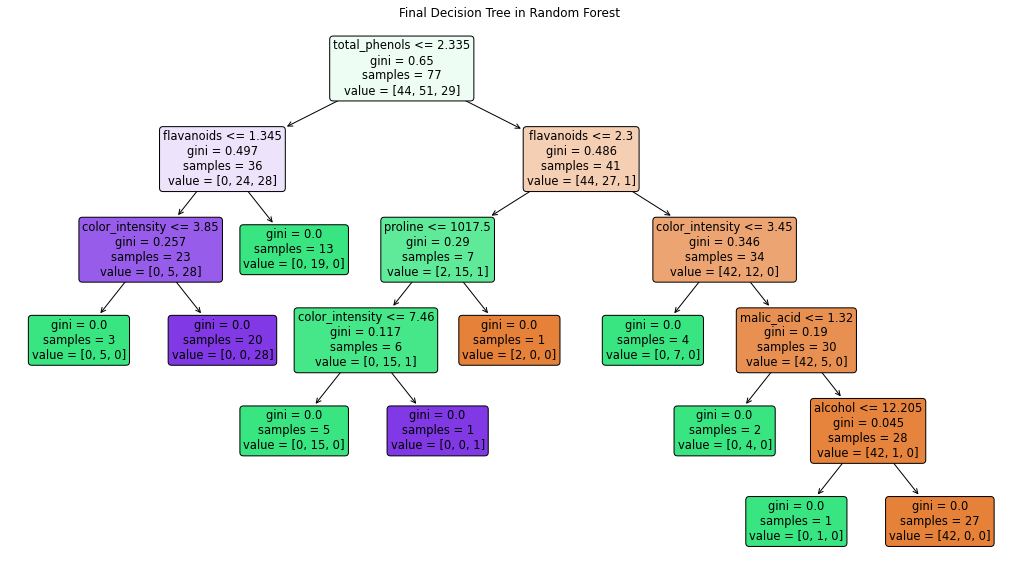

In [31]:
# Visualize Final tree made
plt.figure(figsize = (18,10))

tree.plot_tree(rf.estimators_[-1], feature_names = X.columns,
               filled = True, rounded = True)

plt.title('Final Decision Tree in Random Forest', size = 12)

plt.show()

In [32]:
# Get feature importances for each decision tree iteration (n = 100)
features = [x for x in X.columns]
importances = [x for x in rf.feature_importances_]

df_forest_imps = pd.DataFrame()
df_forest_imps['feature'] = features
df_forest_imps['importance'] = importances
df_forest_imps.sort_values(by = 'importance', inplace = True, ascending = True)

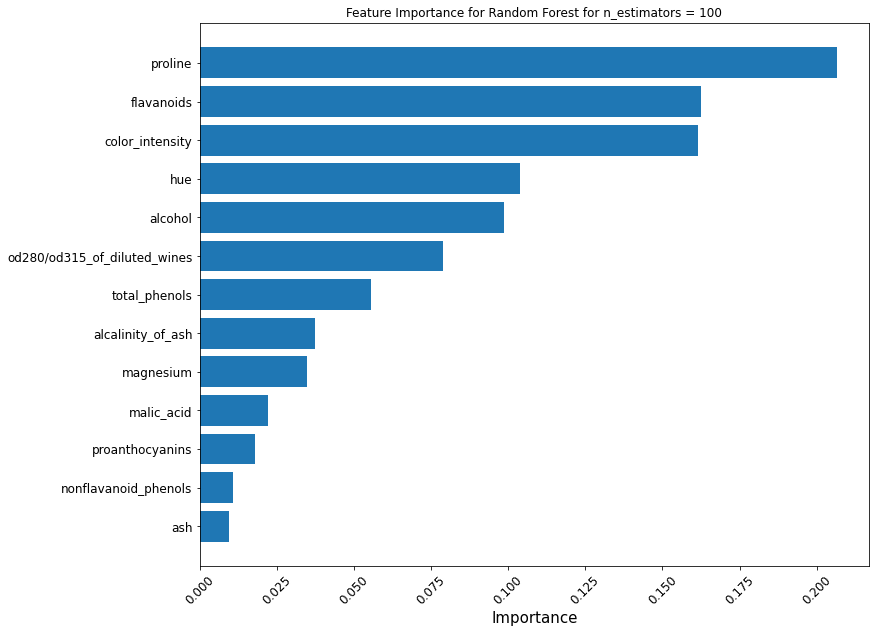

In [33]:
# Visualize most important variables in classification
fig, ax = plt.subplots(1, figsize = (12,10))

ax.barh(y = df_forest_imps['feature'], width = df_forest_imps['importance'])

plt.xticks(rotation = 45, size = 12)
plt.xlabel('Importance', size = 15)
plt.yticks(size = 12)

plt.title('Feature Importance for Random Forest for n_estimators = 100')

plt.show()

In [34]:
# Since ash and non-flavanoid phenols are the two least insignificant, 
# let's remove them to limit overfitting

# Make copies to remove columns
# Use deep to avoid changing shallow copy
copy_X_train = X_train.copy(deep = True)
copy_X_test = X_test.copy(deep = True)

if 'ash' in copy_X_train or 'nonflavanoid_phenols' in copy_X_train:
    copy_X_train.drop(columns = ['ash', 'nonflavanoid_phenols'], inplace = True)

if 'ash' in copy_X_test or 'nonflavanoid_phenols' in copy_X_test:
    copy_X_test.drop(columns = ['ash', 'nonflavanoid_phenols'], inplace = True)

In [35]:
# Lets tune the estimator hyperparameter to half
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators = 80, criterion = "gini",
                             bootstrap = True, oob_score = True, 
                             random_state = 1224)
rf2 = rf2.fit(copy_X_train,y_train)

# Predict Values
forest_pred2 = rf2.predict(copy_X_test)

# Cross validate sample
forest_accuracies2 = cross_val_score(estimator = rf2, X = copy_X_train, y = y_train, cv = 10)

# Output results
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, forest_pred2)))
print("Out-of-bag sample score: {:.2f}".format(rf2.oob_score_))

Accuracy: 1.00
Out-of-bag sample score: 0.98


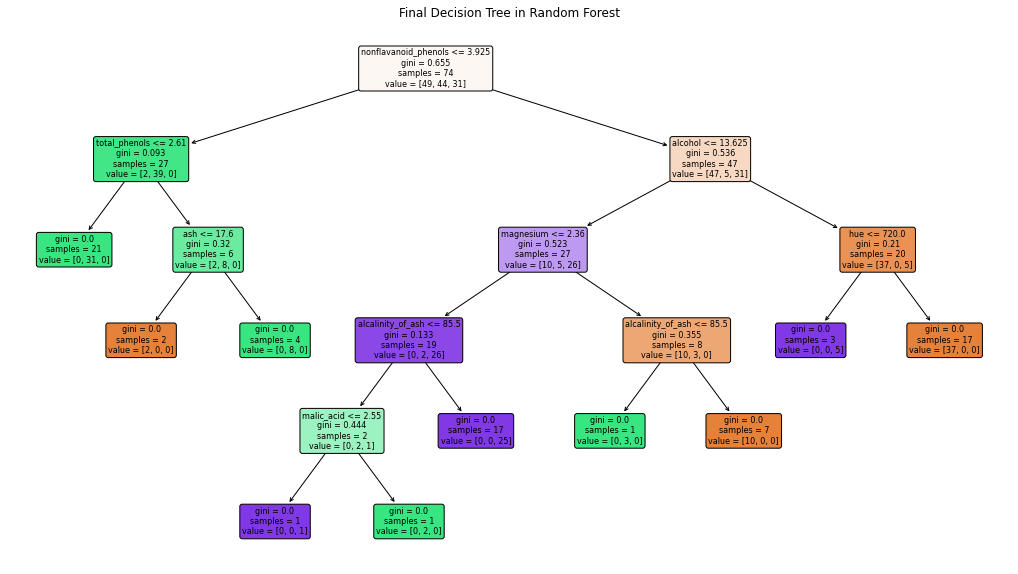

In [36]:
plt.figure(figsize = (18,10))

tree.plot_tree(rf2.estimators_[-1], feature_names = X.columns,
               filled = True, rounded = True)

plt.title('Final Decision Tree in Random Forest', size = 12)

plt.show()

By removing the least important two vars, we were able to achieve perfect accuracy. 
When cross-validated however, it has lower accuracy than the prior. 

## KNN Clustering

In [37]:
# KNN Clusters to try to cluster the same wine types
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, knn_pred)))
print("Cross Validated Accuracy: {:.2f} %".format(knn_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(knn_accuracies.std()))

Accuracy: 0.63 %
Cross Validated Accuracy: 71.03 %
Cross Validated Standard Deviation: 0.08


#### Classification Reports

In [38]:
# Import module
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, SVCy_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.87      0.93        23
           2       1.00      1.00      1.00        17

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.94        54
weighted avg       0.95      0.94      0.95        54



In [40]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.86      0.83      0.84        23
           2       0.93      0.82      0.87        17

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



In [41]:
print(classification_report(y_test, tree_y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.81      0.96      0.88        23
           2       1.00      0.76      0.87        17

    accuracy                           0.89        54
   macro avg       0.91      0.88      0.89        54
weighted avg       0.90      0.89      0.89        54



In [42]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [43]:
print(classification_report(y_test,forest_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [44]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.64      0.70      0.67        23
           2       0.60      0.35      0.44        17

    accuracy                           0.63        54
   macro avg       0.62      0.64      0.61        54
weighted avg       0.63      0.63      0.61        54



# Conclusions

In [45]:
# Support Vector Classifier
print('SVC\n')
print('Accuracy: {:.2f} %'.format(metrics.accuracy_score(y_test, SVCy_pred)))
print('Cross Validated Accuracy: {:.2f} %'.format(svc_accuracies.mean() * 100))
print('Cross Validated Standard Deviation: {:.2f}"'.format(svc_accuracies.std()))
print('\n')

# Decision Trees
print('Decision Trees\n')

# Output max_depth=3 DT
print('\tmax_depth = 3\n')
print("\tAccuracy: {:.2f} %".format(metrics.accuracy_score(y_test, tree_y_pred2)))
print('\tCross Validated Accuracy: {:.2f} %'.format(tree_accuracies2.mean() * 100))
print('\tCross Validated Standard Deviation: {:.2f}'.format(tree_accuracies2.std()))
print('\n')

# Output normal DT
print('\tDefault Settings\n')
print('\tAccuracy: {:.2f} %'.format(metrics.accuracy_score(y_test, tree_y_pred)))
print('\tCross Validated Accuracy: {:.2f} %'.format(tree_accuracies.mean() * 100))
print('\tCross Validated Standard Deviation: {:.2f}'.format(tree_accuracies.std()))
print('\n')

# Output default RF
print('Random Forest Classifier\n')

# Default n = 100
print('\tn_estimators = 100\n')
print('\tAccuracy: {:.2f} %'.format(metrics.accuracy_score(y_test, forest_pred)))
print('\tOut-of-bag sample score: {:.2f}'.format(rf.oob_score_))
print('\n')

# Default n = 80, dropped 2
print('\tn_estimators = 80, dropped two least important\n')
print('\tAccuracy: {:.2f} %'.format(metrics.accuracy_score(y_test, forest_pred2)))
print('\tOut-of-bag sample score: {:.2f}'.format(rf2.oob_score_))
print('\n')

print('KNN Clustering\n')
print('\tAccuracy: {:.2f} %'.format(metrics.accuracy_score(y_test, knn_pred)*100))
print('\tCross Validated Accuracy: {:.2f} %'.format(knn_accuracies.mean() * 100))
print('\tCross Validated Standard Deviation: {:.2f}'.format(knn_accuracies.std()))
print('\n')



SVC

Accuracy: 0.94 %
Cross Validated Accuracy: 91.99 %
Cross Validated Standard Deviation: 0.06"


Decision Trees

	max_depth = 3

	Accuracy: 0.89 %
	Cross Validated Accuracy: 91.86 %
	Cross Validated Standard Deviation: 0.05


	Default Settings

	Accuracy: 0.85 %
	Cross Validated Accuracy: 93.53 %
	Cross Validated Standard Deviation: 0.05


Random Forest Classifier

	n_estimators = 100

	Accuracy: 1.00 %
	Out-of-bag sample score: 0.98


	n_estimators = 80, dropped two least important

	Accuracy: 1.00 %
	Out-of-bag sample score: 0.98


KNN Clustering

	Accuracy: 62.96 %
	Cross Validated Accuracy: 71.03 %
	Cross Validated Standard Deviation: 0.08




# Results

## SVC
The Support-vector kernel creates a new function to categorize the data into classes, each time a data point is added during training. They are a type of non-probabilistic binary classifier -- meaning its function does not represent probability but rather the division between classes.

The SVC model had an accuracy of 94.44%, with a cross-validated score of 91.99% or  ~92%. 

## Decision Trees

Our conclusion that the three classes had statistically significant means for alcohol did not come into play during any decision tree classification.

Decision trees are a classifying model that uses binary decisions to classify the data. Each node, or decision, has a corresponding 'Gini coefficient' or the probability of a misclassification.

Our first default tree achieved 85.18% accuracy, 91.86% when cross-validated. 
By tweaking the max_depth parameter, and limiting the number of decisions made, we help to decrease overfitting the model, and acheive a higher accuracy along the way. This is a good example of how changing model parameters can be super effective.

## Random Forest Classifier

Random Forest Classifiers are effective namely for two reasons. They construct n number of decision trees. They are generally more accurate than normal decision trees, and limit overfitting to the data. 

Using default settings with n_estimators, or number of trees = 100, acheived 100% accuracy.

Using default settings with n_estimators = 80, similarly achieved 100% accuracy

## KNN Clustering

The K-Nearest Neighbors clustering algorithm is unsupervised, so it is difficult to understand the logic behind the data categorization. 

The KNN model acheived the lowest accuracy of 62.96%, ~71% under cross-validation.

# Notes

All cross-validations where done with 10 k-folds.